<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/Romania_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random

#Set up Map as graph: See AIMA Figure 3.1 page 64
Note custom node positions

In [ ]:
# Sample Romania map data with custom node positions
romania_map = {
    'graph_dict': {
        'Arad': {'Zerind': 75, 'Timisoara': 118, 'Sibiu': 140},
        'Zerind': {'Arad': 75, 'Oradea': 71},
        'Oradea': {'Zerind': 71, 'Sibiu': 151},
        'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
        'Timisoara': {'Arad': 118, 'Lugoj': 111},
        'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
        'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
        'Drobeta': {'Mehadia': 75, 'Craiova': 120},
        'Craiova': {'Drobeta': 120, 'Pitesti': 138, 'Rimnicu Vilcea': 146},
        'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
        'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
        'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
        'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
        'Giurgiu': {'Bucharest': 90},
        'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
        'Hirsova': {'Urziceni': 98, 'Eforie': 86},
        'Eforie': {'Hirsova': 86},
        'Vaslui': {'Urziceni': 142, 'Iasi': 92},
        'Iasi': {'Vaslui': 92, 'Neamt': 87},
        'Neamt': {'Iasi': 87}
    },
    'locations': {
        'Arad': (91, 492), 'Zerind': (135, 495), 'Oradea': (200, 490), 'Sibiu': (140, 400),
        'Timisoara': (70, 410), 'Lugoj': (100, 360), 'Mehadia': (120, 310), 'Drobeta': (130, 250),
        'Craiova': (220, 200), 'Rimnicu Vilcea': (180, 320), 'Fagaras': (220, 400),
        'Pitesti': (250, 300), 'Bucharest': (350, 200), 'Giurgiu': (370, 150), 'Urziceni': (400, 210),
        'Hirsova': (460, 240), 'Eforie': (475, 150), 'Vaslui': (490, 300), 'Iasi': (470, 350),
        'Neamt': (450, 400)
    }
}


In [ ]:
node_colors = {node: 'white' for node in romania_map['locations'].keys()}
node_positions = romania_map['locations']
node_label_positions = {k: [v[0], v[1] - 10] for k, v in romania_map['locations'].items()}
edge_weights = {(k, k2): v2 for k, v in romania_map['graph_dict'].items() for k2, v2 in v.items()}

romania_graph_data = {
    'graph_dict': romania_map['graph_dict'],
    'node_colors': node_colors,
    'node_positions': node_positions,
    'node_label_positions': node_label_positions,
    'edge_weights': edge_weights
}

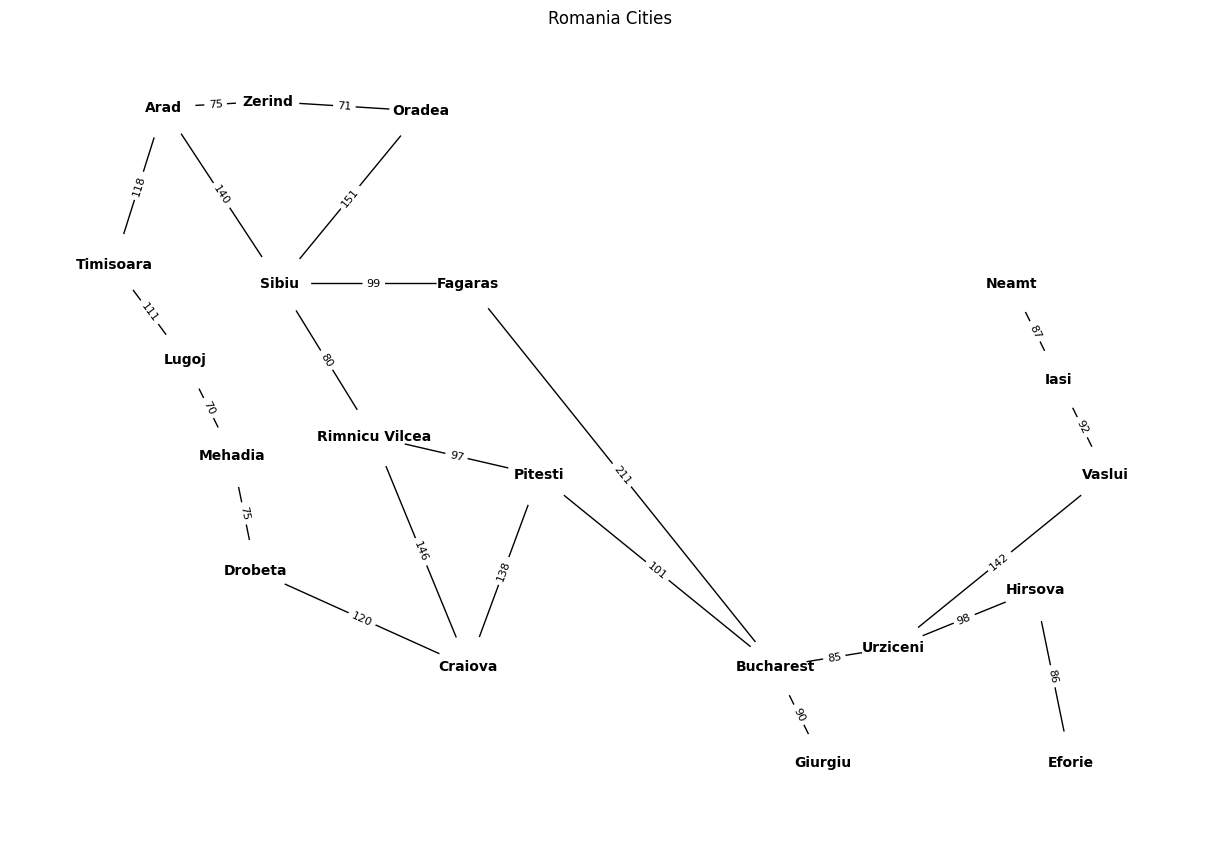

In [ ]:
# Create the graph
graph = nx.Graph()
for node, neighbors in romania_graph_data['graph_dict'].items():
    for neighbor, weight in neighbors.items():
        graph.add_edge(node, neighbor, weight=weight)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(graph,
        pos=romania_graph_data['node_positions'],
        with_labels=True,
        node_size=2000,
        node_color=list(romania_graph_data['node_colors'].values()),
        font_size=10,
        font_weight='bold',
        edge_color='black')

# Add edge labels for weights
nx.draw_networkx_edge_labels(
    graph,
    pos=romania_graph_data['node_positions'],
    edge_labels=romania_graph_data['edge_weights'],
    font_size=8
)

plt.title("Romania Cities")
plt.show()


# Set up  BestFirstSearch AIMA 3.3.1 (page 73)
#Also set up visualize_search to color visited nodes

Execute these cells, but then OK to collapse this section

In [ ]:
class BestFirstSearch:
    def __init__(self, graph, f):
        """
        Initialize the search.
        :param graph: The graph as a dictionary of nodes and neighbors.
        :param f: Function to calculate f(n), which guides the search.
        """
        self.graph = graph
        self.f = f
        self.cost_so_far = {}  # Tracks cumulative costs for Dijkstra

    def search(self, start, goal):
        """
        Perform the best-first search.
        :param start: Starting node.
        :param goal: Goal node.
        :return: List of nodes representing the path from start to goal.
        """
        open_set = []
        self.cost_so_far[start] = 0
        heapq.heappush(open_set, (self.f(start, 0, self.cost_so_far), start, 0))
        came_from = {start: None}
        visited = set()
        visited_order = []

        while open_set:
            _, current, depth = heapq.heappop(open_set)

            if current in visited:
                continue

            visited.add(current)
            visited_order.append(current)

            if current == goal:
                return self.reconstruct_path(came_from, current), visited_order

            for neighbor, weight in self.graph[current].items():
                new_cost = self.cost_so_far[current] + weight
                if neighbor not in self.cost_so_far or new_cost < self.cost_so_far[neighbor]:
                    self.cost_so_far[neighbor] = new_cost
                    heapq.heappush(open_set, (self.f(neighbor, depth + 1, self.cost_so_far), neighbor, depth + 1))
                    came_from[neighbor] = current

        return None, visited_order

    def reconstruct_path(self, came_from, current):
        """
        Reconstruct the path from start to goal.
        :param came_from: Dictionary of predecessors.
        :param current: Goal node.
        :return: Path as a list of nodes.
        """
        path = []
        while current:
            path.append(current)
            current = came_from[current]
        return path[::-1]


In [ ]:
def visualize_search(graph_data, path, visited_nodes):
    """
    Visualize the search on the graph.
    :param graph_data: Data containing node positions and graph info.
    :param path: The path found by the search.
    :param visited_nodes: The nodes visited during the search.
    """
    graph = nx.Graph()
    for node, neighbors in graph_data['graph_dict'].items():
        for neighbor, weight in neighbors.items():
            graph.add_edge(node, neighbor, weight=weight)

    plt.figure(figsize=(12, 8))

    # Highlight visited nodes
    node_colors = graph_data['node_colors'].copy()
    for node in visited_nodes:
        if node in node_colors:
            node_colors[node] = 'yellow'  # Mark as visited
        else:
            print(f"Warning: {node} not found in node_colors!")  # Debugging

    # Highlight the path
    path_edges = list(zip(path, path[1:]))
    edge_colors = ['green' if edge in path_edges else 'black' for edge in graph.edges()]

    # Draw nodes and edges
    nx.draw(
        graph,
        pos=graph_data['node_positions'],
        node_color=[node_colors.get(node, 'white') for node in graph.nodes()],
        with_labels=True,
        node_size=2000,
        font_weight='bold',
        font_size=10,
        edge_color=edge_colors
    )

    # Draw edge labels for weights
    nx.draw_networkx_edge_labels(
        graph,
        pos=graph_data['node_positions'],
        edge_labels=graph_data['edge_weights'],
        font_size=8
    )

    plt.title("Search Progress")
    plt.show()


# **Un**-informed Search: Section 3.4


Searches use same BestFirstSearch algorithm but with different evaluation functions f(node)



*   Breadth first
*   Uniform-cost (Dijkstra)
*   Depth first




Breadth first search: evaluation function is depth of node

See 3.4.1

Path found: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Visited nodes in order: ['Arad', 'Sibiu', 'Timisoara', 'Zerind', 'Fagaras', 'Lugoj', 'Oradea', 'Rimnicu Vilcea', 'Bucharest']


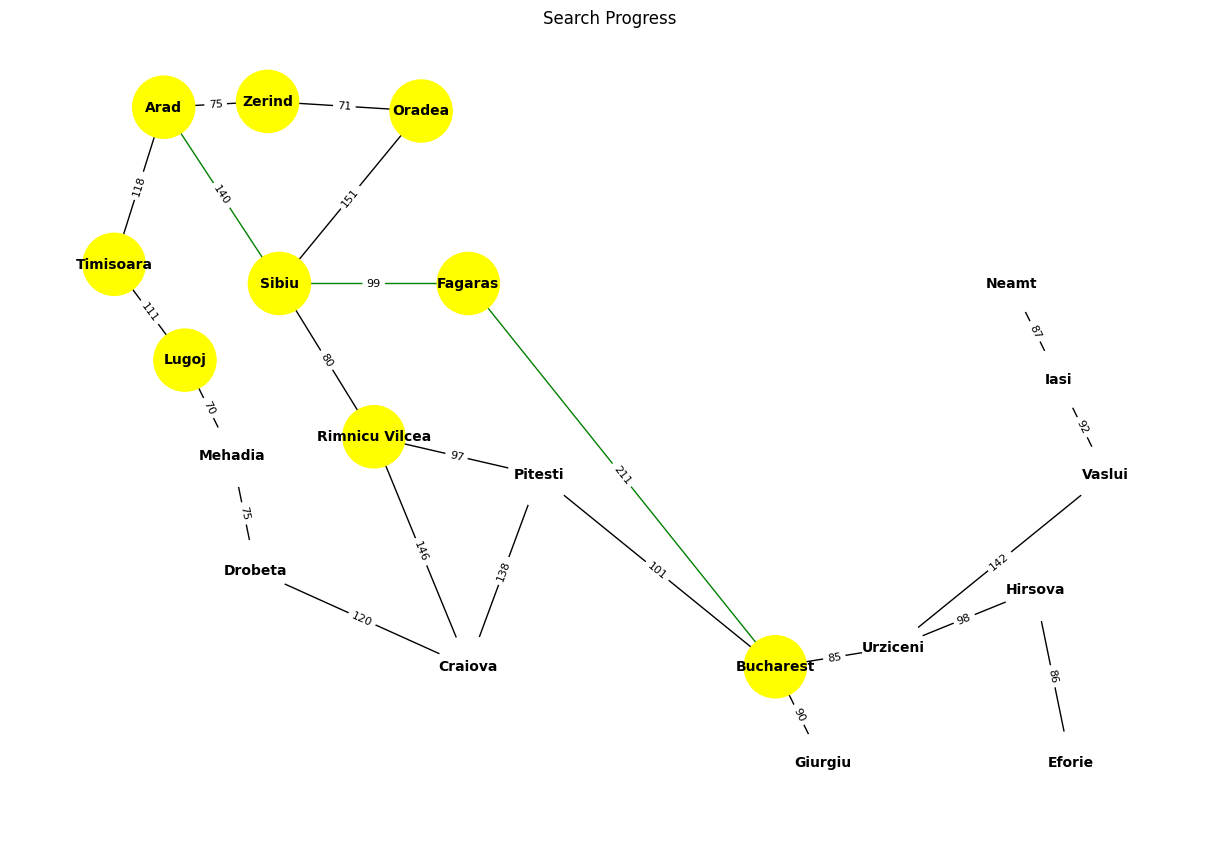

In [ ]:
# Define f(n) as depth of the node with an additional unused third argument
def f_depth(node, depth, cost_so_far):
    return depth


# Run the search
bfs = BestFirstSearch(romania_map['graph_dict'], f=f_depth)
start_node = 'Arad'
goal_node = 'Bucharest'

path, visited_nodes = bfs.search(start_node, goal_node)
print("Path found:", path)
print("Visited nodes in order:", visited_nodes)

# Visualize search progress
visualize_search(romania_graph_data, path, visited_nodes)

Dijkstra (uniform-cost): evaluation function is path-cost

See 3.4.2

In [ ]:
# Define f(n) for Dijkstra's algorithm
def f_dijkstra(node, depth, cost_so_far):
    """
    Dijkstra's cost function.
    :param node: Current node being evaluated.
    :param depth: Current depth (not used in Dijkstra's).
    :param cost_so_far: Dictionary of cumulative costs so far.
    :return: Total cost to reach this node.
    """
    return cost_so_far.get(node, float('inf'))


Path found: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Visited nodes in order: ['Arad', 'Zerind', 'Timisoara', 'Sibiu', 'Oradea', 'Rimnicu Vilcea', 'Lugoj', 'Fagaras', 'Mehadia', 'Pitesti', 'Craiova', 'Drobeta', 'Bucharest']


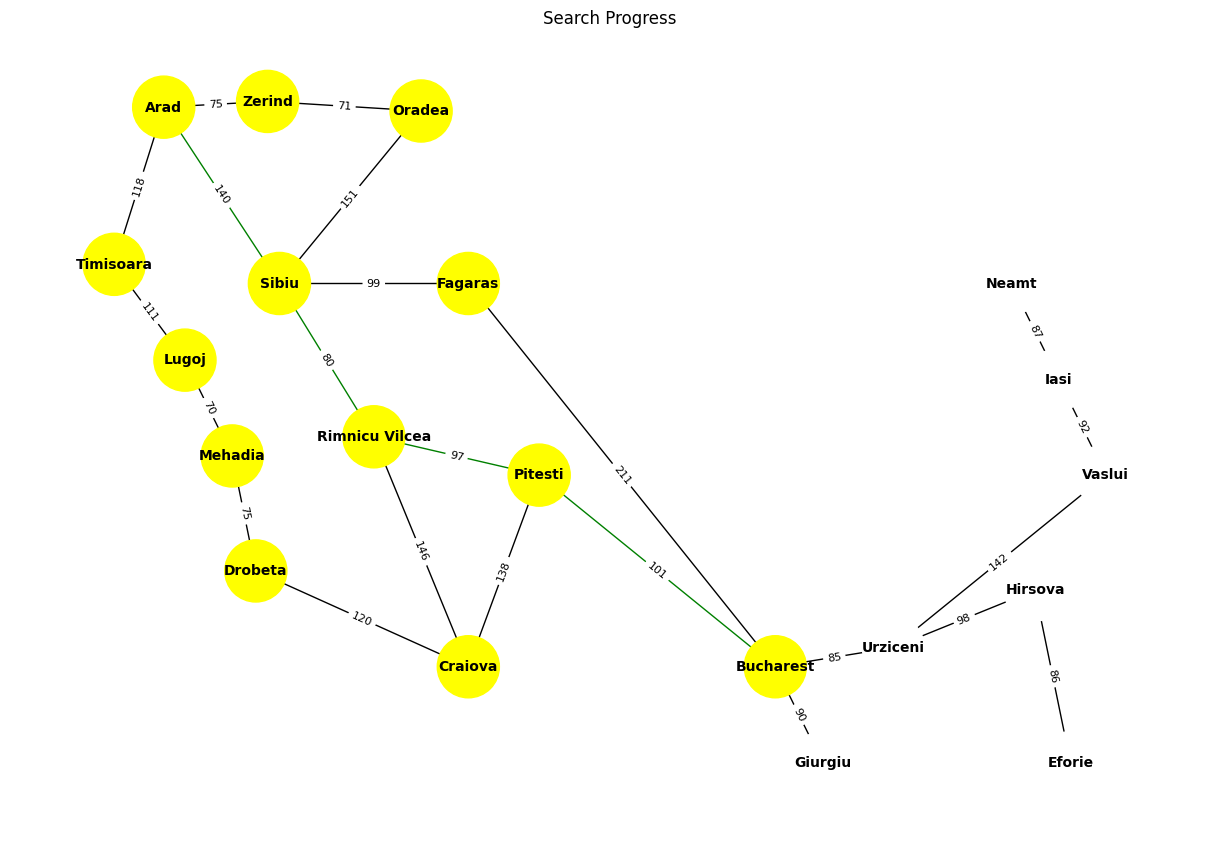

In [ ]:
# Run Dijkstra's search using the BestFirstSearch class
bfs_dijkstra = BestFirstSearch(romania_map['graph_dict'], f=f_dijkstra)
start_node = 'Arad'
goal_node = 'Bucharest'

path, visited_nodes = bfs_dijkstra.search(start_node, goal_node)
print("Path found:", path)
print("Visited nodes in order:", visited_nodes)

# Visualize the search progress
visualize_search(romania_graph_data, path, visited_nodes)


Depth first search: evaluation function is *negative* of node depth, hence expansion is by deepest node in frontier.

See 3.4.3

In [ ]:
# Define f_depth_first(n) as -(depth) of the node, making this a depth-first search
def f_depth_first(node, depth, cost_so_far):
    return -depth

Path found: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Visited nodes in order: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


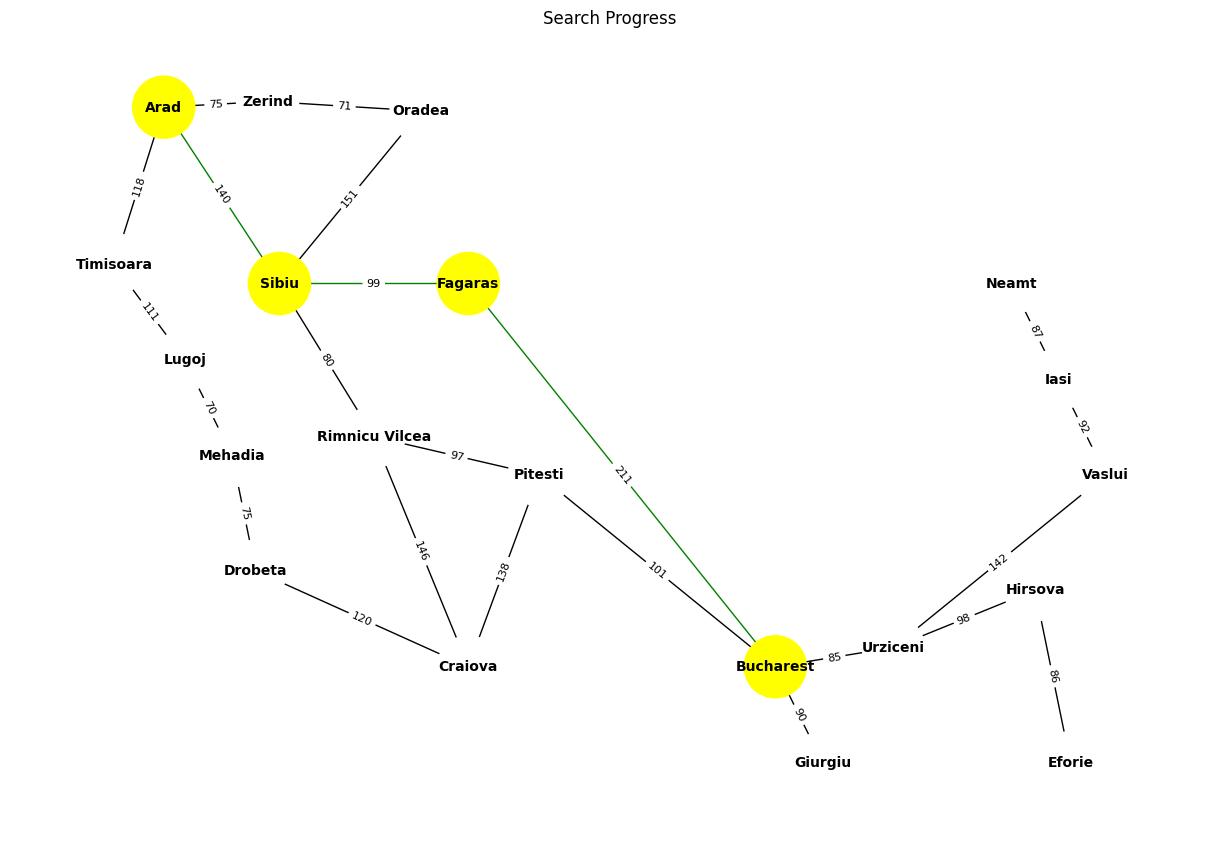

In [ ]:
# Run the search (effectively depth-first search due to the negative depth evaluation function)
bfs = BestFirstSearch(romania_map['graph_dict'], f=f_depth_first)
start_node = 'Arad'
goal_node = 'Bucharest'

path, visited_nodes = bfs.search(start_node, goal_node)
print("Path found:", path)
print("Visited nodes in order:", visited_nodes)

# Visualize search progress
visualize_search(romania_graph_data, path, visited_nodes)

# Informed (Heuristic) Search Strategies: Section 3.5

In [ ]:
import pandas as pd
import numpy as np

First we calculate straight line distances from Bucharest to the cities. We are using the locations (coordinates) used to set up the graph in this notebook.

These align reasonably with those shown in Figure 3.16 page 85

The idea is to use this information external to the problem context to **inform** our search by incorporating a heuristic into the evaluation function for BestFirstSearch.

In [ ]:

# Location data with coordinates (already defined at top of notebook when setting up the graph)
locations = {
    'Arad': (91, 492), 'Zerind': (135, 495), 'Oradea': (200, 490), 'Sibiu': (140, 400),
    'Timisoara': (70, 410), 'Lugoj': (100, 360), 'Mehadia': (120, 310), 'Drobeta': (130, 250),
    'Craiova': (220, 200), 'Rimnicu Vilcea': (180, 320), 'Fagaras': (220, 400),
    'Pitesti': (250, 300), 'Bucharest': (350, 200), 'Giurgiu': (370, 150), 'Urziceni': (400, 210),
    'Hirsova': (460, 240), 'Eforie': (475, 150), 'Vaslui': (490, 300), 'Iasi': (470, 350),
    'Neamt': (450, 400)
}

# Function to calculate straight-line distance using numpy
def calculate_distance(coord1, coord2):
    return round(np.linalg.norm(np.array(coord2) - np.array(coord1)))

# Compute distances from Arad to all locations
bucharest_coords = locations['Bucharest']
distances = {loc: calculate_distance(bucharest_coords, coords) for loc, coords in locations.items()}

# Create a sorted table
distance_table = pd.DataFrame(list(distances.items()), columns=['Location', 'Dist Bucharest'])
distance_table = distance_table.sort_values(by='Location').reset_index(drop=True)

# Display the table
print(distance_table)


          Location  Dist Bucharest
0             Arad             390
1        Bucharest               0
2          Craiova             130
3          Drobeta             226
4           Eforie             135
5          Fagaras             239
6          Giurgiu              54
7          Hirsova             117
8             Iasi             192
9            Lugoj             297
10         Mehadia             255
11           Neamt             224
12          Oradea             326
13         Pitesti             141
14  Rimnicu Vilcea             208
15           Sibiu             290
16       Timisoara             350
17        Urziceni              51
18          Vaslui             172
19          Zerind             365


Greedy best first search using straight line distances above.

See Section 3.5.1 page 85.



In [ ]:
# Create a distance heuristic for Greedy Best-First Search
def f_SLD(node, depth, cost_so_far):
    # `depth` and `cost_so_far` are unused in this heuristic
    # Use .loc to access the distance value by city name
    return distance_table.loc[distance_table['Location'] == node, 'Dist Bucharest'].iloc[0]

In [ ]:
f_SLD('Iasi', None, None)

192

Path found: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Visited nodes in order: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Craiova', 'Pitesti', 'Bucharest']


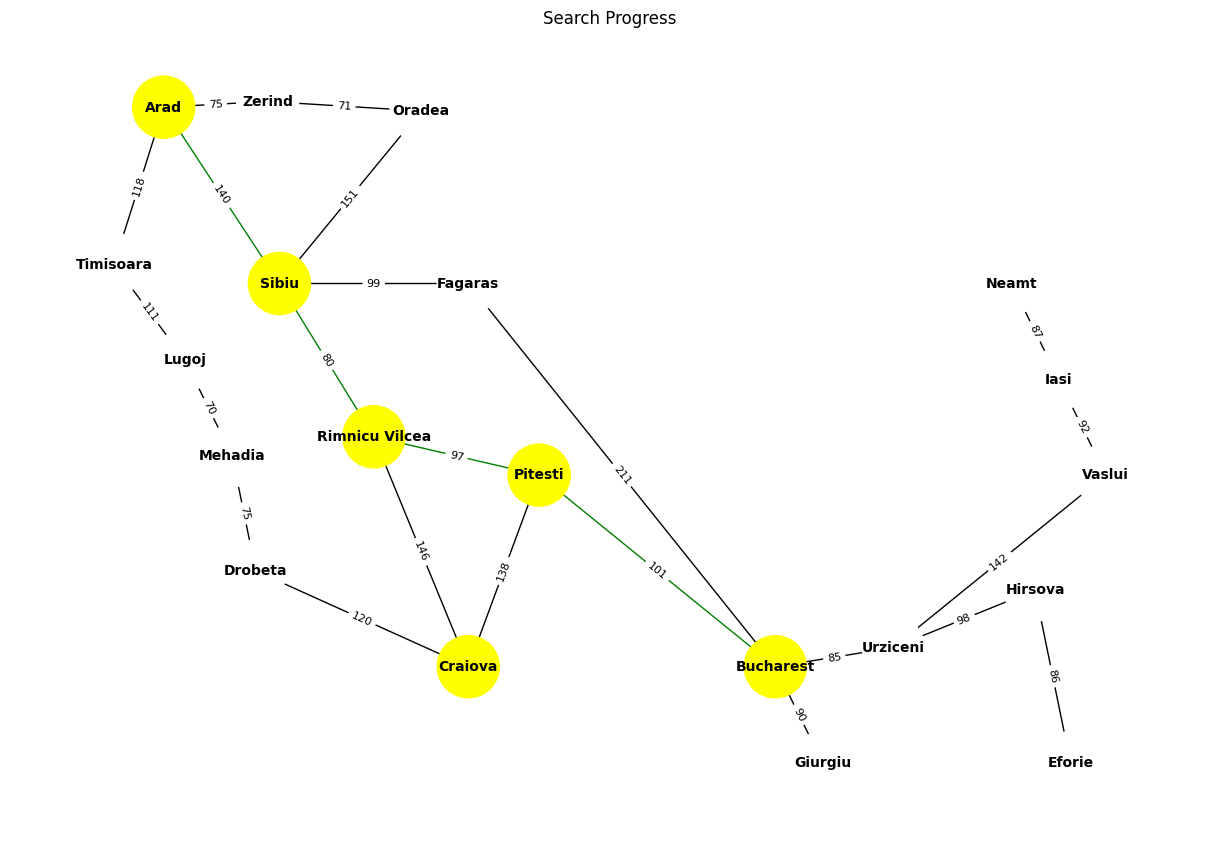

In [ ]:
# Run the search
bfs = BestFirstSearch(romania_map['graph_dict'], f=f_SLD)
start_node = 'Arad'
goal_node = 'Bucharest'

path, visited_nodes = bfs.search(start_node, goal_node)
print("Path found:", path)
print("Visited nodes in order:", visited_nodes)

# Visualize search progress
visualize_search(romania_graph_data, path, visited_nodes)

In [ ]:
print(distance_table.sort_values(by='Dist Bucharest').reset_index(drop=True))

          Location  Dist Bucharest
0        Bucharest               0
1         Urziceni              51
2          Giurgiu              54
3          Hirsova             117
4          Craiova             130
5           Eforie             135
6          Pitesti             141
7           Vaslui             172
8             Iasi             192
9   Rimnicu Vilcea             208
10           Neamt             224
11         Drobeta             226
12         Fagaras             239
13         Mehadia             255
14           Sibiu             290
15           Lugoj             297
16          Oradea             326
17       Timisoara             350
18          Zerind             365
19            Arad             390


A* search

See Section 3.5.2 page 85.



In [ ]:
# Create a distance heuristic for A* Search
def f_A_star(node, depth, cost_so_far):
    """
    Combines the cost-so-far with a straight-line distance heuristic for A* Search.

    Parameters:
    - node: The current node or city name.
    - depth: The depth of the node in the search tree (defaults to 0 if None).
    - cost_so_far: The accumulated cost to reach the node.

    Returns:
    - A heuristic value combining cost-so-far and straight-line distance.
    """
    # Default depth to 0 if None
    depth = depth if depth is not None else 0

    # Combine the two heuristics
    cost = f_depth(node=node, depth=depth, cost_so_far=cost_so_far)
    heuristic = f_SLD(node=node, depth=None, cost_so_far=None)  # Explicitly pass None for unused parameters
    return cost +heuristic



In [ ]:
f_A_star('Iasi', None, None)

192

Path found: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Visited nodes in order: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Craiova', 'Pitesti', 'Bucharest']


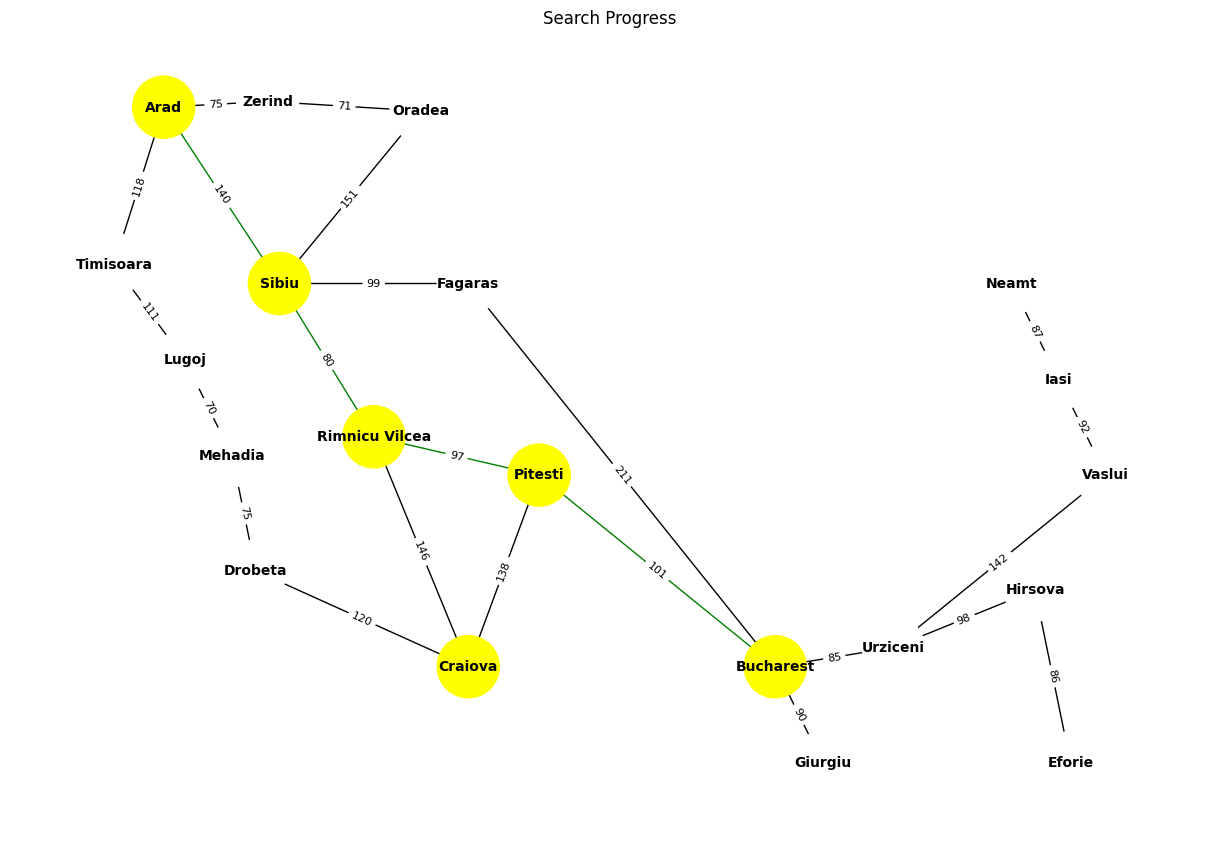

In [ ]:
# Run the search
bfs = BestFirstSearch(romania_map['graph_dict'], f=f_A_star)
start_node = 'Arad'
goal_node = 'Bucharest'

path, visited_nodes = bfs.search(start_node, goal_node)
print("Path found:", path)
print("Visited nodes in order:", visited_nodes)

# Visualize search progress
visualize_search(romania_graph_data, path, visited_nodes)